In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
contracts = pd.read_csv("data_119/contracts.csv")

In [3]:
contracts['recipient_name'] = contracts['recipient_name'].replace({'BAYASSOCIATES INCORPORATED':'BAYASSOCIATES, INC.', 'BAYASSOCIATES, INC': 'BAYASSOCIATES, INC.'})
contracts['recipient_name'] = contracts['recipient_name'].replace({'TERESA TRIANA':'TERESA, TRIANA'})
contracts['recipient_name'] =  contracts['recipient_name'].replace({'BEATRICE COCKRELL':'COCKRELL, BEATRICE'})



In [4]:
contracts['funding_agency_name'] = contracts['funding_agency_name'].replace({'DEPARTMENT OF HOUSING AND URBAN DEVELOPMENT (HUD)': 'HUD',
                                                                            'ENVIRONMENTAL PROTECTION AGENCY (EPA)': 'EPA',
                                                                            'DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS)': 'HHS',
                                                                            'NATIONAL SCIENCE FOUNDATION (NSF)' : 'NSF',
                                                                            'DEPARTMENT OF TRANSPORTATION (DOT)': 'DOT'})

In [5]:
contracts.columns

Index(['contract_award_unique_key', 'obligated_amount',
       'period_of_performance_start_date',
       'period_of_performance_current_end_date', 'funding_agency_name',
       'funding_sub_agency_name', 'recipient_name',
       'primary_place_of_performance_county_name', 'recipient_city_name',
       'naics_description', 'number_of_employees', 'annual_revenue',
       'multi_year_contract_code', 'minority_owned_business',
       'black_american_owned_business', 'hispanic_american_owned_business',
       'federally_funded_research_and_development_corp', 'us_state_government',
       'sole_proprietorship', 'us_government_entity',
       'educational_institution', 'manufacturer_of_goods',
       'limited_liability_corporation', 'for_profit_organization',
       'nonprofit_organization', 'other_not_for_profit_organization',
       'start_year'],
      dtype='object')

In [6]:
contracts.loc[contracts['black_american_owned_business'] == True].groupby(['recipient_name'])['contract_award_unique_key'].count()



recipient_name
AKRIVIS TECHNOLOGIES, LLC              2
APHIOS CORPORATION                     3
ATAASK GLOBAL INC.                     2
BAYASSOCIATES, INC.                    5
BRYANT ASSOCIATES, INC.                2
CLARENDON VALUATION ADVISORS, LLC      2
COCKRELL, BEATRICE                     9
GONA, PHILIMON                         1
GORDON, PATRICK                        2
HARLOW SCIENTIFIC, LLC                 1
INTELIMAP INC                          2
JMW SYSTEMS                            1
WESTCARB ENTERPRISES, INC.             3
WESTNET, INC.                        564
WINDWALKER GROUP, LLC                  1
Name: contract_award_unique_key, dtype: int64

In [7]:
contracts.loc[contracts['hispanic_american_owned_business'] == True].groupby(['recipient_name'])['contract_award_unique_key'].count()


recipient_name
BIODIRECT INC.                            4
BLANCO, EDGAR E                           1
BRUNETTE, MARIA                           1
CONVERGENCE MEDICAL DEVICES INC.          1
CORTES, DHARMA E                          3
GVC CONSTRUCTION AND ENGINEERING, INC.    1
MEDICAL SPECIALTIES DISTRIBUTORS, LLC     1
MIKRON, INC                               5
MOURA'S CLEANING SERVICE, INC.            2
NEO-ADVENT TECHNOLOGIES LLC               1
TERESA, TRIANA                            1
UNIC PRO, INC.                            4
Name: contract_award_unique_key, dtype: int64

In [8]:
contracts.loc[contracts['black_american_owned_business'] == True].groupby(['recipient_name'])['obligated_amount'].mean()


recipient_name
AKRIVIS TECHNOLOGIES, LLC            262186.000000
APHIOS CORPORATION                   181159.666667
ATAASK GLOBAL INC.                     7262.980000
BAYASSOCIATES, INC.                   60697.000000
BRYANT ASSOCIATES, INC.              349354.250000
CLARENDON VALUATION ADVISORS, LLC     90543.090000
COCKRELL, BEATRICE                     2971.666667
GONA, PHILIMON                        33000.000000
GORDON, PATRICK                        3306.000000
HARLOW SCIENTIFIC, LLC                36045.000000
INTELIMAP INC                         30325.000000
JMW SYSTEMS                            7735.700000
WESTCARB ENTERPRISES, INC.              468.320000
WESTNET, INC.                         10751.934929
WINDWALKER GROUP, LLC                497153.000000
Name: obligated_amount, dtype: float64

In [9]:
contracts.groupby(['black_american_owned_business'])['obligated_amount'].mean() 

black_american_owned_business
False    278191.720475
True      14998.489333
Name: obligated_amount, dtype: float64

In [10]:
contracts.groupby(['black_american_owned_business'])['annual_revenue'].mean() 

black_american_owned_business
False    6.026028e+09
True     4.538118e+05
Name: annual_revenue, dtype: float64

In [11]:
contracts.groupby(['hispanic_american_owned_business'])['annual_revenue'].mean() 

hispanic_american_owned_business
False    5.821871e+09
True     7.790131e+06
Name: annual_revenue, dtype: float64

In [12]:
contracts.groupby(['hispanic_american_owned_business'])['annual_revenue'].mean() 

hispanic_american_owned_business
False    5.821871e+09
True     7.790131e+06
Name: annual_revenue, dtype: float64

In [13]:
contracts.groupby(['hispanic_american_owned_business'])['obligated_amount'].mean() 

hispanic_american_owned_business
False    269851.737146
True     124468.254000
Name: obligated_amount, dtype: float64

In [14]:
contracts.groupby(['funding_agency_name'])[['contract_award_unique_key']].count()

,contract_award_unique_key
funding_agency_name,
DOT,4
EPA,2700
HHS,15502
HUD,199
NSF,94


In [15]:
contracts.loc[contracts['black_american_owned_business'] == True].groupby(['funding_agency_name'])[['contract_award_unique_key']].count()

,contract_award_unique_key
funding_agency_name,
EPA,9
HHS,575
HUD,16


In [16]:
#contracts[contracts['hispanic_american_owned_business'] == True].groupby('recipient_city_name').count()

In [17]:
#contracts[contracts['minority_owned_business'] == True].groupby('recipient_city_name').count()

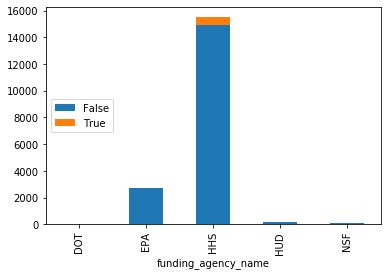

In [18]:
contracts.groupby(['funding_agency_name', 'black_american_owned_business']).size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc='center left')
plt.show()


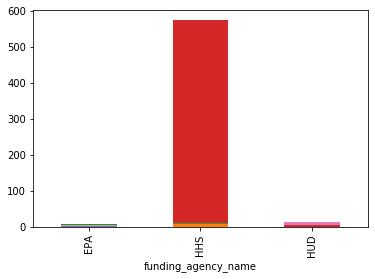

In [19]:
contracts[contracts['black_american_owned_business'] == True].groupby(['funding_agency_name', 'recipient_name'])[['contract_award_unique_key']].count().unstack().plot(kind='bar',stacked=True, legend=False)
plt.show()

In [20]:
len(contracts[contracts['black_american_owned_business'] == True]['recipient_name'].unique())

15

In [21]:
len(contracts['recipient_name'].unique())

1478

In [22]:
len(contracts[contracts['minority_owned_business'] == True]['recipient_name'].unique())

85

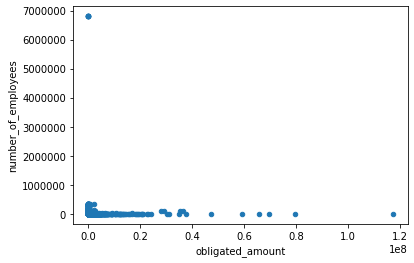

In [23]:
contracts.plot.scatter(x= 'obligated_amount', y='number_of_employees')#, c='black_american_owned_business', colormap='viridis')

In [35]:
contracts['number_of_employees'].max()

6800000.0

In [36]:
contracts['obligated_amount'].max()

348888718.0

In [39]:
contracts.groupby(['sole_proprietorship'])['annual_revenue'].mean() 

sole_proprietorship
False    5.426029e+09
True     1.523064e+09
Name: annual_revenue, dtype: float64

In [28]:
contracts[contracts['nonprofit_organization'] == True]['recipient_name'].unique())

177

In [42]:
contracts.groupby(['minority_owned_business', 'limited_liability_corporation'])['recipient_name'].count()

minority_owned_business  sole_proprietorship
False                    False                  20094
                         True                     576
True                     False                   1006
                         True                      17
Name: recipient_name, dtype: int64